# Movie Recommendation System

## 1. Importing Libraries and Datasets

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [2]:
#timestamp feature ignored

movies = pd.read_csv('movies.csv', sep = '\t', usecols = ['movie_id', 'title', 'genres'])
ratings = pd.read_csv('ratings.csv', sep = '\t', usecols = ['user_id', 'movie_id', 'rating'])
users = pd.read_csv('users.csv', sep = '\t', usecols=['user_id', 'gender', 'zipcode', 'age_desc', 'occ_desc'])

## 2. Data Visualization and Exploration

### Movies DataFrame

In [3]:
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  3883 non-null   int64 
 1   title     3883 non-null   object
 2   genres    3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [5]:
movies.describe()

,movie_id
count,3883.000000
mean,1986.049446
std,1146.778349
min,1.000000
25%,982.500000
50%,2010.000000
75%,2980.500000
max,3952.000000


### Users DataFrame

In [6]:
users.head()

,user_id,gender,zipcode,age_desc,occ_desc
0,1,F,48067,Under 18,K-12 student
1,2,M,70072,56+,self-employed
2,3,M,55117,25-34,scientist
3,4,M,02460,45-49,executive/managerial
4,5,M,55455,25-34,writer


In [7]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   user_id   6040 non-null   int64 
 1   gender    6040 non-null   object
 2   zipcode   6040 non-null   object
 3   age_desc  6040 non-null   object
 4   occ_desc  6040 non-null   object
dtypes: int64(1), object(4)
memory usage: 236.1+ KB


### Ratings DataFrame

In [8]:
ratings.head()

,user_id,movie_id,rating
0,1,1193,5
1,1,661,3
2,1,914,3
3,1,3408,4
4,1,2355,5


In [9]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 3 columns):
 #   Column    Non-Null Count    Dtype
---  ------    --------------    -----
 0   user_id   1000209 non-null  int64
 1   movie_id  1000209 non-null  int64
 2   rating    1000209 non-null  int64
dtypes: int64(3)
memory usage: 22.9 MB


In [10]:
ratings.describe()

,user_id,movie_id,rating
count,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.024512e+03,1.865540e+03,3.581564e+00
std,1.728413e+03,1.096041e+03,1.117102e+00
min,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.506000e+03,1.030000e+03,3.000000e+00
50%,3.070000e+03,1.835000e+03,4.000000e+00
75%,4.476000e+03,2.770000e+03,4.000000e+00
max,6.040000e+03,3.952000e+03,5.000000e+00


---

<Figure size 648x360 with 0 Axes>

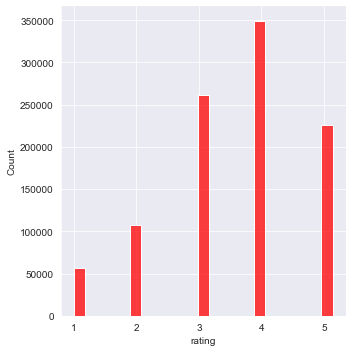

In [11]:
sns.set_style('darkgrid')
plt.figure(figsize = (9,5))

sns.displot(ratings['rating'].fillna(ratings['rating'].median), color = 'red', binwidth = 0.18)

In [12]:
ratings['rating'].describe()

count    1.000209e+06
mean     3.581564e+00
std      1.117102e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

**Average rating given by all users is 3.58 out of 5. with a standard deviation of 1.11. 25% of the movies have been rated 3 out of 5 (2,50,00 people rated 3 which is approx 25% of 1,000,000) while 50~75 % of the movies have been rated 4 out of 5 which showcases that overall all users have rated most of the movies good.**

---

In [13]:
df = pd.merge(pd.merge(movies, ratings),users)
df.head()

,movie_id,title,genres,user_id,rating,gender,zipcode,age_desc,occ_desc
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,F,48067,Under 18,K-12 student
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,F,48067,Under 18,K-12 student
2,150,Apollo 13 (1995),Drama,1,5,F,48067,Under 18,K-12 student
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,F,48067,Under 18,K-12 student
4,527,Schindler's List (1993),Drama|War,1,5,F,48067,Under 18,K-12 student


In [14]:
df[['title','genres','rating']].sort_values(by = 'rating', ascending = False).head(5)

,title,genres,rating
0,Toy Story (1995),Animation|Children's|Comedy,5
489283,American Beauty (1999),Comedy|Drama,5
489259,Election (1999),Comedy,5
489257,"Matrix, The (1999)",Action|Sci-Fi|Thriller,5
489256,Dead Ringers (1988),Drama|Thriller,5


**Top 5 movies with highest ratings are Toy Story, American Beauty, Election, The Matrix and Dead Ringers.**

## 4. Data Pre-processing

 **Handling for NaN's**

In [15]:
ratings['user_id'] = ratings['user_id'].fillna(0)
ratings['movie_id'] = ratings['movie_id'].fillna(0)

# Replace NaN values in rating column with average of all values
ratings['rating'] = ratings['rating'].fillna(ratings['rating'].mean())

## 5. Implementation

In [16]:
from sklearn.model_selection import train_test_split
# Sampling 2% of Dataset
actual_dataset = ratings.sample(frac = 0.02)

**Split the Dataset in a 7:3 train:test ratio using `train_test_split`**

In [17]:
train, test = train_test_split(actual_dataset, test_size = 0.2)

**Create two User-Item matrices for the training data and test data.** 

In [18]:
train.head()

,user_id,movie_id,rating
196573,1207,1391,3
299635,1778,805,4
85539,558,223,3
866193,5223,1573,3
997433,6023,527,5


**Convert to numpy array for ease-of-use.**

In [19]:
train_matrix = train.to_numpy()
test_matrix = test.to_numpy()

print(train_matrix.shape)
print(test_matrix.shape)

(16003, 3)
(4001, 3)


**User Based CF: Calculate Pearson Correlation between users**

In [20]:
from sklearn.metrics.pairwise import pairwise_distances

user_matrix = 1 - pairwise_distances(train, metric = 'correlation')
user_matrix[np.isnan(user_matrix)] = 0
print(user_matrix[:4, :4])

[[1.         0.76364379 0.72137942 0.64325078]
 [0.76364379 1.         0.99800695 0.98555063]
 [0.72137942 0.99800695 1.         0.99427502]
 [0.64325078 0.98555063 0.99427502 1.        ]]


In [21]:
user_matrix.shape

(16003, 16003)

In [22]:
print(user_matrix[:5,:5])

[[1.         0.76364379 0.72137942 0.64325078 0.46144407]
 [0.76364379 1.         0.99800695 0.98555063 0.92516893]
 [0.72137942 0.99800695 1.         0.99427502 0.94727654]
 [0.64325078 0.98555063 0.99427502 1.         0.97609037]
 [0.46144407 0.92516893 0.94727654 0.97609037 1.        ]]


<AxesSubplot:>

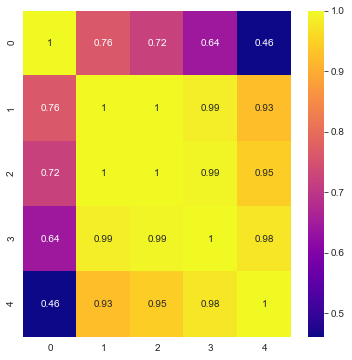

In [23]:
plt.figure(figsize = (6,6))
sns.heatmap(user_matrix[:5,:5], annot = True, cmap = 'plasma')

**Item Based CF: Calculate Cosine between items**

In [35]:
item_matrix = 1 - pairwise_distances(train_matrix.T, metric = 'cosine')
item_matrix[np.isnan(item_matrix)] = 0

In [36]:
item_matrix.shape

(3, 3)

In [37]:
item_matrix

array([[1.        , 0.74340932, 0.82908321],
       [0.74340932, 1.        , 0.81261005],
       [0.82908321, 0.81261005, 1.        ]])

<AxesSubplot:>

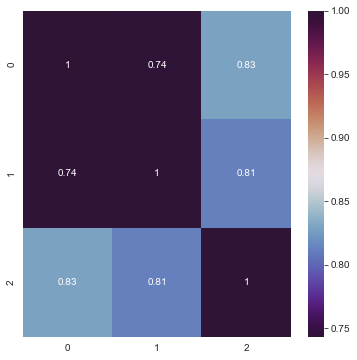

In [38]:
plt.figure(figsize = (6,6))
sns.heatmap(item_matrix, annot = True, cmap = 'twilight_shifted')

**Make Predictions**

1. **For User Based CF** : 

- Find average rating of target user
- Calculate Similarity with all users
- Predict rating

2. **For Item based CF** :
- Find Item-Item similarity (cosine, here)
- Predict rating

In [39]:
def predict(ratings, similarity, type='user'):
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        # Use np.newaxis so that mean_user_rating has same format as ratings
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis])
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return pred

**Evaluation with R.M.S.E.**

In [40]:
from sklearn.metrics import mean_squared_error
from math import sqrt


def RMSE(pred, actual):
    pred = pred[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    return sqrt(mean_squared_error(pred, actual))

In [42]:
user_prediction = predict(train_matrix, user_matrix, type ='user')
item_prediction = predict(train_matrix, item_matrix, type ='item')

In [43]:
print('Performance on Test Set\r')
print('User-based CF RMSE: ' + str(RMSE(user_prediction, test_matrix)))
print('Item-based CF RMSE: ' + str(RMSE(item_prediction, test_matrix)))

Performance on Test Set
User-based CF RMSE: 1411.6413341206628
Item-based CF RMSE: 1785.8244004035546


In [44]:
print('Performance on Training Set\r')
print('User-based CF RMSE: ' + str(RMSE(user_prediction, train_matrix)))
print('Item-based CF RMSE: ' + str(RMSE(item_prediction, train_matrix)))

Performance on Training Set
User-based CF RMSE: 695.6797089926853
Item-based CF RMSE: 1465.3545713653043
